### Scenario 1

For most financial institutions, such as banks and multi-finance companies, their main source of income is coming from their lending activities. By engaging in this activity, it means that lenders are exposed to the potential risk, where debtors stop repaying their loans, causing losses to the lenders. To mitigate this loss, lenders are expected to appropriately choose who are qualified for a loan, at what rate, and at what amount. In this question, you are tasked to help the troubled lenders with this problem by creating a model that can help them make their decision. 

### Task
Create a model to rank the loan applicants based on their repayment capability. The rank will then be used to choose who are eligible for a loan, lower interest rate and higher credit limit. Consider the following points when you are creating the model:

•	 Describe the data pre-processing step that you did

•	Choose the most appropriate metrics to measure the model performance and provide explanation on why you choose them

•	Choose 3 of the most important features (original or derived features) and explain how and why they are important

•	 Choose the most appropriate model and provide explanation on why and how the model can solve the lenders problem

•	 Submit the model and all the analysis that you made complete with the test set result (Accuracy, Precision/Recall, F1, AUC, etc)


### Import Library and Load Dataset

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import os
import glob
import numpy as np
import openpyxl
import os
import os.path as path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
data_train = pd.read_csv('app_train.csv')
data_train

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,130325,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,...,-14268,-5813,-2313.0,-2709,FRIDAY,6,Electricity,0.295858,0.104877,0.616122
61499,294665,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,...,-21582,365243,-4106.0,-4191,TUESDAY,12,NA1,0.693816,0.411595,0.239226
61500,73002,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,...,-17729,-1564,-11844.0,-1263,FRIDAY,16,Industry: type 12,0.802154,0.714627,NaN
61501,184610,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,...,-11258,-4159,-5060.0,-3698,FRIDAY,15,Business Entity Type 3,NaN,0.694125,0.105473


### LOAN APP TEST and LOAN APP TRAIN 
#### Columns	Description
LN_ID	: Loan ID

TARGET	: Target variable (1 - client with late payment more than X days, 0 - all other cases)

CONTRACT_TYPE	: Identification if loan is cash or revolving

GENDER	: Gender of the client

NUM_CHILDREN	:Number of children the client has

INCOME	:Monthly income of the client

APPROVED_CREDIT	:Approved credit amount of the loan

ANNUITY	:Loan annuity (amount that must be paid monthly)

PRICE	:For consumer loans it is the price of the goods for which the loan is given

INCOME_TYPE	:Clients income type (businessman, working, maternity leave,…)

EDUCATION	:The client highest education

FAMILY_STATUS	:Family status of the client

HOUSING_TYPE	:What is the housing situation of the client (renting, living with parents, ...)

DAYS_AGE	:Client's age in days at the time of application

DAYS_WORK	:How many days before the application the person started current job

DAYS_REGISTRATION	:How many days before the application did client change his registration

DAYS_ID_CHANGE	:How many days before the application did client change the identity document with which he applied for the 
loan

WEEKDAYS_APPLY	:On which day of the week did the client apply for the loan

HOUR_APPLY	:Approximately at what hour did the client apply for the loan

ORGANIZATION_TYPE	:Type of organization where client works

EXT_SCORE_1	:Normalized score from external data source

EXT_SCORE_2	:Normalized score from external data source

EXT_SCORE_3	:Normalized score from external data source

LN_ID : ID Pinjaman

TARGET : Variabel target (1 - klien dengan keterlambatan pembayaran lebih dari X hari, 0 - semua kasus lainnya)

CONTRACT_TYPE : Identifikasi apakah pinjaman tunai atau bergulir

GENDER : Gender klien

NUM_CHILDREN :Jumlah anak yang dimiliki klien

PENGHASILAN:Penghasilan bulanan klien

APPROVED_CREDIT : Jumlah kredit pinjaman yang disetujui

ANNUITAS : Pinjaman anuitas (jumlah yang harus dibayar setiap bulan)

HARGA : Untuk pinjaman konsumen adalah harga barang yang diberikan pinjaman

INCOME_TYPE : Jenis pendapatan klien (pengusaha, bekerja, cuti hamil,…)

PENDIDIKAN : Pendidikan tertinggi klien

FAMILY_STATUS : Status keluarga klien

HOUSING_TYPE : Bagaimana situasi perumahan klien (menyewa, tinggal bersama orang tua, ...)

DAYS_AGE :Usia klien dalam hari pada saat aplikasi

DAYS_WORK : Berapa hari sebelum lamaran orang tersebut memulai pekerjaan saat ini

DAYS_REGISTRATION : Berapa hari sebelum aplikasi klien mengubah pendaftarannya

DAYS_ID_CHANGE : Berapa hari sebelum aplikasi klien mengubah dokumen identitas yang dia ajukan untuk
pinjaman

WEEKDAYS_APPLY : Pada hari apa dalam seminggu klien mengajukan pinjaman

HOUR_APPLY :Kira-kira jam berapa klien mengajukan pinjaman

ORGANIZATION_TYPE : Jenis organisasi tempat klien bekerja

EXT_SCORE_1 :Skor yang dinormalisasi dari sumber data eksternal

EXT_SCORE_2 :Skor yang dinormalisasi dari sumber data eksternal

EXT_SCORE_3 :Skor yang dinormalisasi dari sumber data eksternal

## Data Understanding

In [90]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         61503 non-null  int64  
 1   LN_ID              61503 non-null  int64  
 2   TARGET             61503 non-null  int64  
 3   CONTRACT_TYPE      61503 non-null  object 
 4   GENDER             61503 non-null  object 
 5   NUM_CHILDREN       61503 non-null  int64  
 6   INCOME             61503 non-null  float64
 7   APPROVED_CREDIT    61503 non-null  float64
 8   ANNUITY            61502 non-null  float64
 9   PRICE              61441 non-null  float64
 10  INCOME_TYPE        61503 non-null  object 
 11  EDUCATION          61503 non-null  object 
 12  FAMILY_STATUS      61503 non-null  object 
 13  HOUSING_TYPE       61503 non-null  object 
 14  DAYS_AGE           61503 non-null  int64  
 15  DAYS_WORK          61503 non-null  int64  
 16  DAYS_REGISTRATION  615

In [94]:
data_train.describe()

,Unnamed: 0,LN_ID,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,AGE
count,61503.000000,61503.000000,61503.000000,61503.000000,6.150300e+04,6.150300e+04,61502.000000,6.144100e+04,61503.000000,61503.000000,61503.000000,61503.000000,61503.000000,26658.000000,6.136900e+04,49264.000000,61503.000000
mean,153729.986927,278151.136416,0.080793,0.411850,1.690789e+05,5.976899e+05,27083.323315,5.369033e+05,-16057.481033,64882.262768,-4976.696324,-2996.374681,12.055136,0.504081,5.141378e-01,0.510787,43.993099
std,88881.478853,102918.206671,0.272519,0.716686,1.339697e+05,4.016493e+05,14470.508291,3.685742e+05,4363.536919,142154.440320,3520.926325,1512.409598,3.273323,0.210390,1.912087e-01,0.194541,11.954896
min,6.000000,100009.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,2164.500000,4.500000e+04,-25229.000000,-17912.000000,-22928.000000,-6274.000000,0.000000,0.018334,8.173617e-08,0.000527,21.021918
25%,76545.500000,188767.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,-19716.500000,-2761.000000,-7479.000000,-4304.000000,10.000000,0.336294,3.926921e-01,0.370650,34.109589
50%,153893.000000,278357.000000,0.000000,0.000000,1.485000e+05,5.124465e+05,24853.500000,4.500000e+05,-15753.000000,-1208.000000,-4498.000000,-3263.000000,12.000000,0.508522,5.658808e-01,0.535276,43.158904
75%,230884.500000,367424.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12450.000000,-276.000000,-1996.000000,-1713.000000,14.000000,0.677160,6.637879e-01,0.667458,54.017808
max,307510.000000,456255.000000,1.000000,9.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,-7673.000000,365243.000000,0.000000,0.000000,23.000000,0.951624,8.549997e-01,0.896010,69.120548


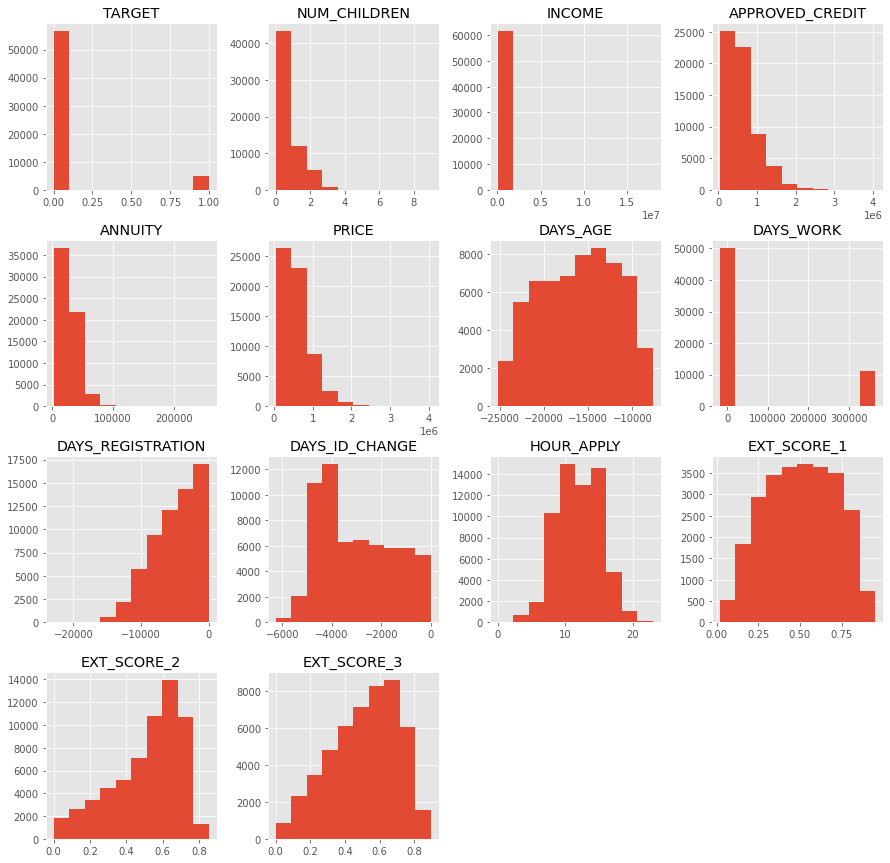

In [92]:
column = ['TARGET','NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'HOUR_APPLY', 'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2',
       'EXT_SCORE_3']

data_train.hist(column=column, figsize = (15,15))
plt.show()

array([[<AxesSubplot:title={'center':'AGE'}>]], dtype=object)

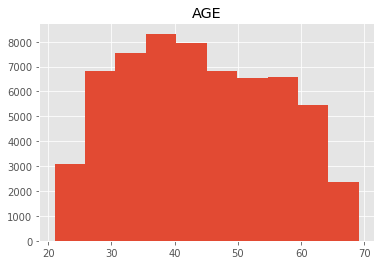

In [93]:
data_train['AGE'] = data_train['DAYS_AGE']/-365
data_train.hist(column='AGE')

### Check Ratio Target

1 = Client with late payment

0 = Client On-time payment

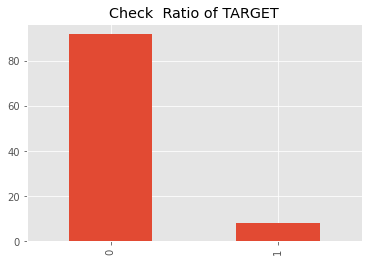

0    56534
1     4969
Name: TARGET, dtype: int64
0    91.920719
1     8.079281
Name: TARGET, dtype: float64


In [59]:
target_count = data_train.TARGET.value_counts()
percentage= data_train.TARGET.value_counts(normalize=True)*100
percentage.plot.bar()
plt.title("Check  Ratio of TARGET")
plt.show()
print(target_count)
print(percentage)


### Data balance
There are 92 % client on Target who can do loan payment On-Time and 8 % client who cannot do loan payment On-Time 

## Data Exploration

by Data Category

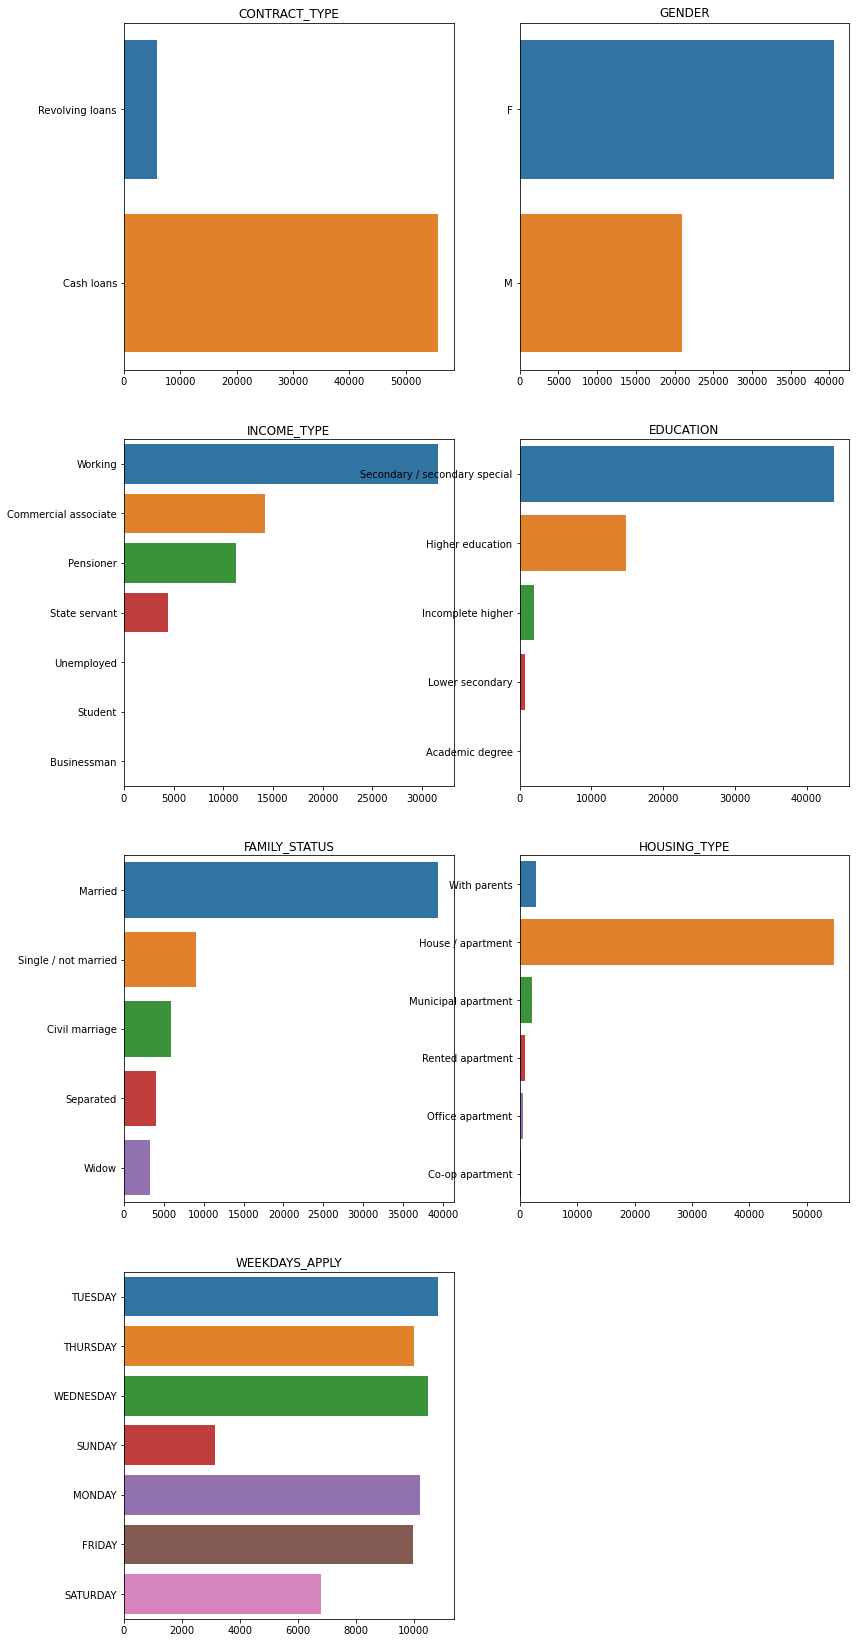

In [7]:
data_train_category = ['CONTRACT_TYPE', 'GENDER','INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 
                      'HOUSING_TYPE', 'WEEKDAYS_APPLY']
plt.figure(figsize=(13,60), facecolor='white')
plotnumber =1
for category in data_train_category:
    ax = plt.subplot(8,2,plotnumber)
    sns.countplot(y=category ,data=data_train)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(category)
    plotnumber+=1
plt.show()

In [86]:
for category in data_train_category:
    problempayment= data_train.groupby(category)['TARGET'].mean().sort_values(ascending=False)
    print(problempayment)
#     problempayment.plot.bar()
#     plt.show()



CONTRACT_TYPE
Cash loans         0.083484
Revolving loans    0.054962
Name: TARGET, dtype: float64
GENDER
M    0.103322
F    0.069151
Name: TARGET, dtype: float64
INCOME_TYPE
Unemployed              0.200000
Working                 0.097119
Commercial associate    0.075192
State servant           0.056728
Pensioner               0.051382
Businessman             0.000000
Student                 0.000000
Name: TARGET, dtype: float64
EDUCATION
Lower secondary                  0.110526
Secondary / secondary special    0.090253
Incomplete higher                0.082641
Higher education                 0.051320
Academic degree                  0.029412
Name: TARGET, dtype: float64
FAMILY_STATUS
Civil marriage          0.106444
Single / not married    0.100454
Separated               0.077834
Married                 0.074016
Widow                   0.065478
Name: TARGET, dtype: float64
HOUSING_TYPE
Rented apartment       0.141700
With parents           0.109997
Municipal apartment    0.086700

Insight:
* Unemployed have highest probability client with late payment on 'INCOME_TYPE' category
* Bussinesman and student have no problem with loan payment
* Clients with Academic degree are higher probability to pay the loan On-Time 
* Female clients most likely pay the loan On-Time 
* Clients with rented apartment Unemployed have highest probability client wilth late payment on 'HOUSING_TYPE'  category

### HeatMap Check Correlation of Data

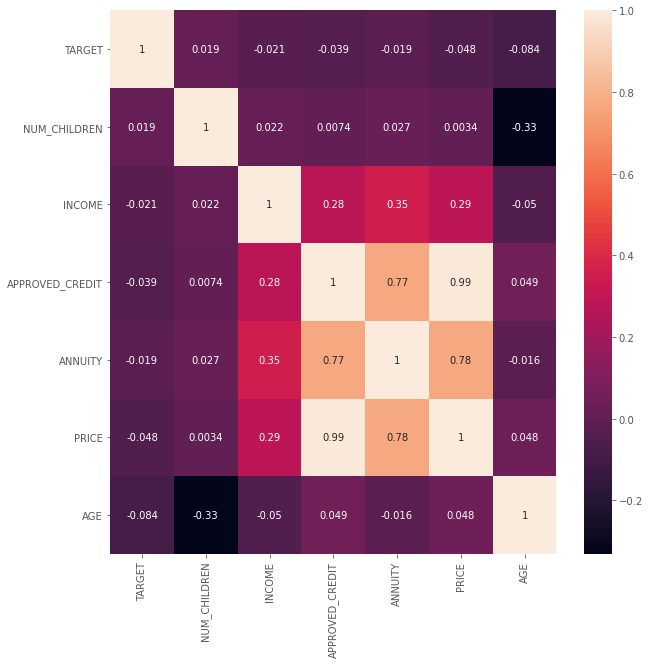

In [100]:
data_corr = data_train[['TARGET', 'NUM_CHILDREN', 'INCOME','APPROVED_CREDIT','ANNUITY', 'PRICE', 'AGE']]
plt.figure(figsize=[10,10])
sns.heatmap(data_corr.corr(),annot=True)
plt.show()

In [101]:
late_train = data_train[data_train['TARGET'] == 1]
ontime_train = data_train[data_train['TARGET'] == 0]
late_train.shape

(4969, 25)

In [108]:
ontime_sample = ontime_train.sample(n=4969)
data_train2 = pd.concat([late_train, ontime_sample], axis=0)
data_train2.columns


Index(['Unnamed: 0', 'LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER',
       'NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE',
       'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY',
       'HOUR_APPLY', 'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2',
       'EXT_SCORE_3', 'AGE'],
      dtype='object')

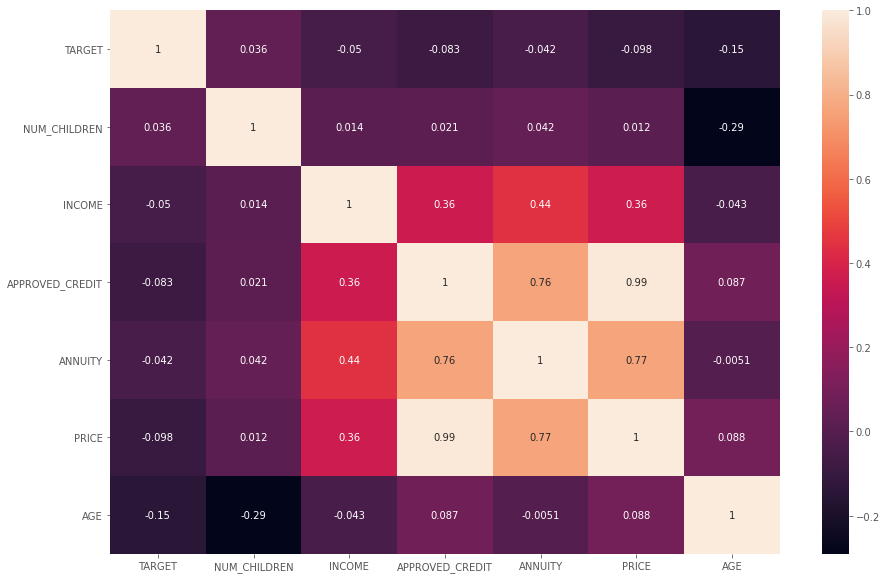

In [204]:
data_train2= data_train2[['TARGET', 'NUM_CHILDREN', 'INCOME','APPROVED_CREDIT','ANNUITY', 'PRICE', 'AGE']]
plt.figure(figsize=[15,10])
sns.heatmap(data_train2.corr(),annot=True)
plt.show()

* Age, Price, and Income are most appropriate metrics to measure the model 

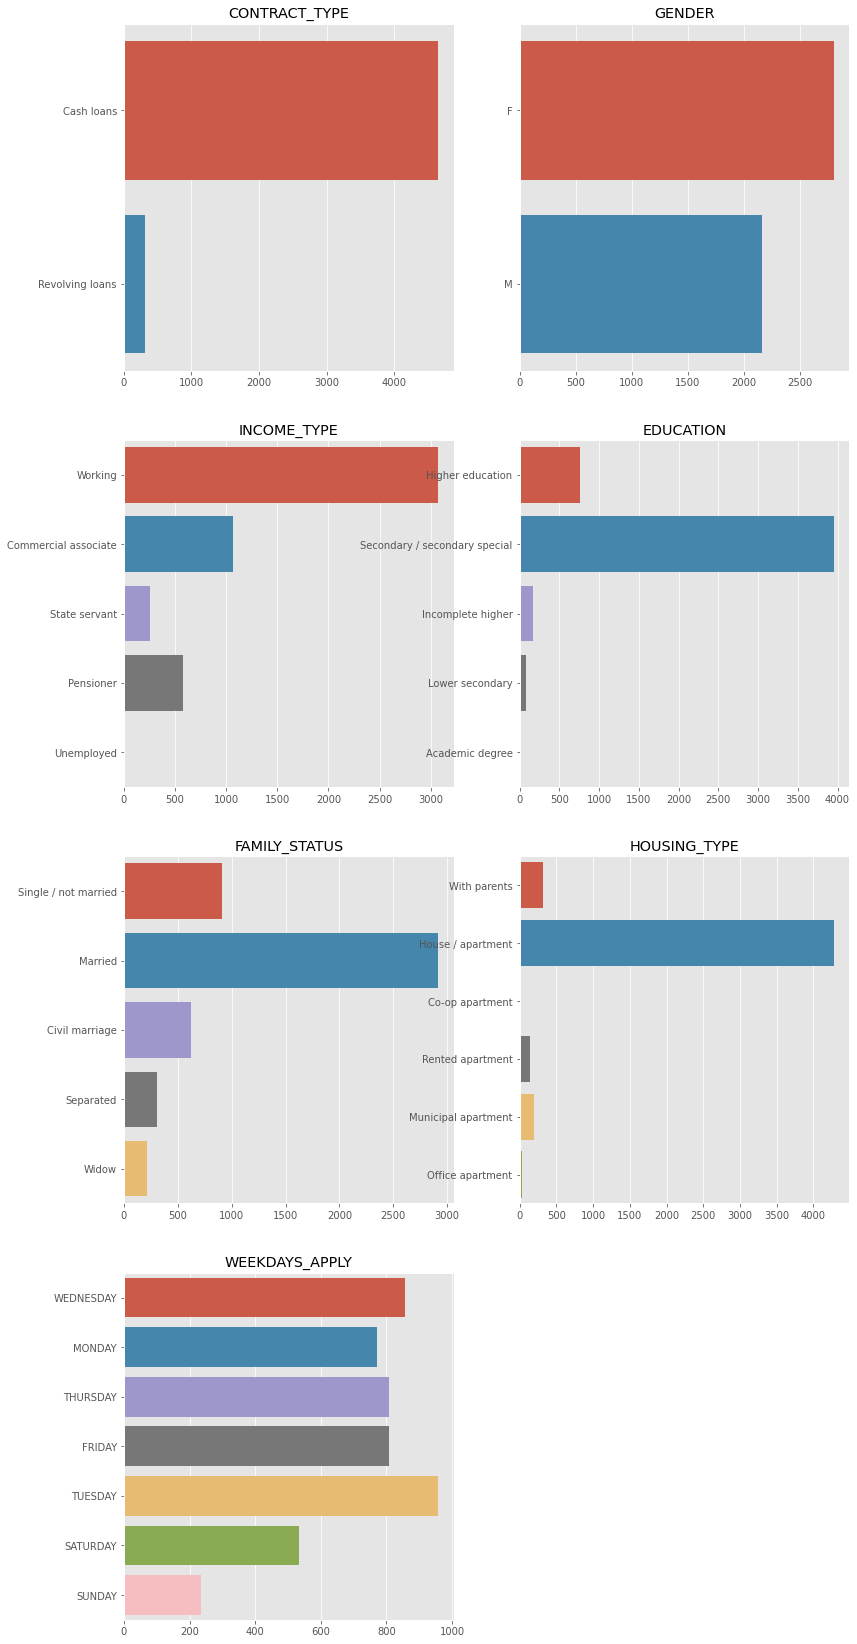

In [60]:
data_train_category = ['CONTRACT_TYPE', 'GENDER','INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 
                      'HOUSING_TYPE', 'WEEKDAYS_APPLY']
plt.figure(figsize=(13,60), facecolor='white')
plotnumber =1
for category in data_train_category:
    ax = plt.subplot(8,2,plotnumber)
    sns.countplot(y=category ,data=problem_train)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(category)
    plotnumber+=1
plt.show()

In [11]:
data_test= pd.read_csv('app_test.csv')
data_test

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,35895,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,69154,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,222185,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,147680,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,38250,144293,0,Cash loans,F,1,67500.0,112500.0,7317.0,112500.0,...,-12866,-3154,-1251.0,-4395,TUESDAY,10,Government,0.570305,0.399628,0.586740
14757,148422,272093,1,Cash loans,F,1,135000.0,313438.5,21073.5,283500.0,...,-11421,-3962,-5247.0,-3795,SATURDAY,7,Self-employed,NaN,0.610758,0.368969
14758,130286,251117,0,Cash loans,F,0,157500.0,1078200.0,31522.5,900000.0,...,-13313,-2258,-3899.0,-4515,MONDAY,12,Other,NaN,0.639824,0.782608
14759,202131,334313,0,Cash loans,F,0,216000.0,272520.0,21658.5,225000.0,...,-24085,365243,-9354.0,-4740,THURSDAY,15,NA1,NaN,0.642139,0.584990


In [12]:
data_payment = pd.read_csv('installment_payment.csv')
data_payment

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,5,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375
1,8,2723183,112102,14,-197.0,-197.0,70.740,70.740
2,11,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080
3,17,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450
4,18,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000
...,...,...,...,...,...,...,...,...
2872301,13605282,1024845,407119,5,-224.0,-230.0,24819.660,24819.660
2872302,13605286,2597827,448211,18,-44.0,-44.0,915.795,915.795
2872303,13605319,2003162,450999,16,-2135.0,-2113.0,5414.265,5384.880
2872304,13605341,2149043,415032,9,-425.0,-434.0,46517.490,46517.490


### Installment payment
#### Columns	Description

LN_ID_PREV,"ID of previous loan (One loan can have 0,1,2 or more previous loan application)"

LN_ID,Loan ID

INST_NUMBER,On which installment we observe payment

INST_DAYS,When the installment of previous credit was supposed to be paid (relative to application date of current loan)

PAY_DAYS,When was the installments of previous credit paid actually (relative to application date of current loan)

AMT_INST,What was the prescribed installment amount of previous credit on this installment

AMT_PAY,What the client actually paid on previous credit on this installment

LN_ID_PREV,"ID pinjaman sebelumnya (Satu pinjaman dapat memiliki 0,1,2 atau lebih aplikasi pinjaman sebelumnya)"

LN_ID, ID Pinjaman

INST_NUMBER,Pada angsuran mana kami mengamati pembayaran

INST_DAYS,Kapan angsuran kredit sebelumnya seharusnya dibayar (relatif terhadap tanggal aplikasi pinjaman saat ini)

PAY_DAYS,Kapan sebenarnya cicilan kredit sebelumnya dibayarkan (berdasarkan tanggal pengajuan pinjaman saat ini)

AMT_INST,Berapa jumlah angsuran yang ditentukan dari kredit sebelumnya pada angsuran ini

AMT_PAY,Apa yang sebenarnya dibayar klien pada kredit sebelumnya pada angsuran ini

	

In [13]:
data_prev = pd.read_csv('prev_app.csv')
data_prev

,Unnamed: 0,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350707,1670100,1379569,309506,Cash loans,33389.100,1035000.0,1035000.0,NaN,1035000.0,THURSDAY,10,Refused,-156,60.0,low_normal,NaN,NaN,NaN,NaN
350708,1670115,1252861,363895,Cash loans,56754.000,1350000.0,1350000.0,NaN,1350000.0,THURSDAY,16,Refused,-847,48.0,middle,NaN,NaN,NaN,NaN
350709,1670139,1379406,302265,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,13,Canceled,-502,NaN,NA1,NaN,NaN,NaN,NaN
350710,1670160,2698899,161204,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,13,Canceled,-359,NaN,NA1,NaN,NaN,NaN,NaN


LN_ID_PREV,"ID of previous loan (One loan can have 0,1,2 or more previous loan application)"

LN_ID,Loan ID

CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application"

ANNUITY,Loan annuity (amount that must be paid monthly) of previous application

APPLICATION,For how much credit did client ask on the previous application

APPROVED_CREDIT,"Final approved credit amount on the previous application. This differs from APPLICATION in a way that the APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT"

AMT_DOWN_PAYMENT,Down payment on the previous application

PRICE,For consumer loans it is the price of the goods for which the loan is given

WEEKDAYS_APPLY,On which day of the week did the client apply for the previous loan

HOUR_APPLY,Approximately at what hour did the client apply for the previous loan

CONTRACT_STATUS,"Contract status (approved, cancelled, ...) of previous application"

DAYS_DECISION,Relative to current application when was the decision about previous application made

TERM_PAYMENT,Term of previous credit at application of the previous application

YIELD_GROUP,Grouped interest rate into small medium and high of the previous application

FIRST_DRAW,Relative to application date of current application when was the first disbursement of the previous application (in days)

FIRST_DUE,Relative to application date of current application when was the first due supposed to be of the previous application (in days)

TERMINATION,Relative to application date of current application when was the expected termination of the previous application

NFLAG_INSURED_ON_APPROVAL,Did the client requested insurance during the previous application

LN_ID_PREV,"ID pinjaman sebelumnya (Satu pinjaman dapat memiliki 0,1,2 atau lebih aplikasi pinjaman sebelumnya)"

LN_ID, ID Pinjaman

CONTRACT_TYPE,"Jenis produk kontrak (Pinjaman tunai, pinjaman konsumen [POS] ,...) dari aplikasi sebelumnya"

ANNUITAS, Pinjaman anuitas (jumlah yang harus dibayar bulanan) dari aplikasi sebelumnya

APLIKASI, Untuk berapa banyak kredit yang diminta klien pada aplikasi sebelumnya

APPROVED_CREDIT,"Jumlah kredit akhir yang disetujui pada aplikasi sebelumnya. Ini berbeda dari APPLICATION dalam hal APPLICATION adalah jumlah yang awalnya diajukan klien, tetapi selama proses persetujuan kami, dia bisa saja menerima jumlah yang berbeda - AMT_CREDIT"

AMT_DOWN_PAYMENT,Uang muka pada aplikasi sebelumnya

HARGA,Untuk pinjaman konsumen adalah harga barang yang diberikan pinjaman

WEEKDAYS_APPLY,Pada hari apa dalam seminggu klien mengajukan pinjaman sebelumnya

HOUR_APPLY,Kira-kira pada jam berapa klien mengajukan pinjaman sebelumnya

CONTRACT_STATUS,"Status kontrak (disetujui, dibatalkan, ...) dari aplikasi sebelumnya"

DAYS_DECISION,Relatif terhadap aplikasi saat ini ketika keputusan tentang aplikasi sebelumnya dibuat

TERM_PAYMENT, Jangka waktu kredit sebelumnya pada aplikasi aplikasi sebelumnya

YIELD_GROUP,Kelompokkan suku bunga menjadi kecil menengah dan tinggi dari aplikasi sebelumnya

FIRST_DRAW,Relatif terhadap tanggal aplikasi aplikasi saat ini saat pencairan pertama dari aplikasi sebelumnya (dalam hari)

FIRST_DUE,Relatif terhadap tanggal aplikasi dari aplikasi saat ini ketika jatuh tempo pertama seharusnya dari aplikasi sebelumnya (dalam hari)

PENGHENTIAN, Sehubungan dengan tanggal aplikasi aplikasi saat ini kapan penghentian yang diharapkan dari aplikasi sebelumnya

NFLAG_INSURED_ON_APPROVAL,Apakah klien meminta asuransi selama aplikasi sebelumnya?

In [66]:
join= pd.merge(data_train, data_payment,on='LN_ID',how='inner')
join.isnull().sum()

Unnamed: 0_x               0
LN_ID                      0
TARGET                     0
CONTRACT_TYPE              0
GENDER                     0
NUM_CHILDREN               0
INCOME                     0
APPROVED_CREDIT            0
ANNUITY                   37
PRICE                   1621
INCOME_TYPE                0
EDUCATION                  0
FAMILY_STATUS              0
HOUSING_TYPE               0
DAYS_AGE                   0
DAYS_WORK                  0
DAYS_REGISTRATION          0
DAYS_ID_CHANGE             0
WEEKDAYS_APPLY             0
HOUR_APPLY                 0
ORGANIZATION_TYPE          0
EXT_SCORE_1          1313320
EXT_SCORE_2             2703
EXT_SCORE_3           408810
Unnamed: 0_y               0
SK_ID_PREV                 0
INST_NUMBER                0
INST_DAYS                  0
PAY_DAYS                 557
AMT_INST                   0
AMT_PAY                  557
dtype: int64

In [14]:
column_desc = pd.read_csv('columns_description.csv')
column_desc

,Table,Columns,Description
0,loanapptrain.csv / loanapptest.csv,LN_ID,Loan ID
1,loanapptrain.csv / loanapptest.csv,TARGET,Target variable (1 - client with late payment ...
2,loanapptrain.csv / loanapptest.csv,CONTRACT_TYPE,Identification if loan is cash or revolving
3,loanapptrain.csv / loanapptest.csv,GENDER,Gender of the client
4,loanapptrain.csv / loanapptest.csv,NUM_CHILDREN,Number of children the client has
5,loanapptrain.csv / loanapptest.csv,INCOME,Monthly income of the client
6,loanapptrain.csv / loanapptest.csv,APPROVED_CREDIT,Approved credit amount of the loan
7,loanapptrain.csv / loanapptest.csv,ANNUITY,Loan annuity (amount that must be paid monthly)
8,loanapptrain.csv / loanapptest.csv,PRICE,For consumer loans it is the price of the good...
9,loanapptrain.csv / loanapptest.csv,INCOME_TYPE,"Clients income type (businessman, working, mat..."


In [15]:
# Generate Pandas Profiling Report
# profile = ProfileReport(data_train, title="Report Loanapptrain")

# View in Notebook
# profile

# Prepare Data for Model

In [115]:
print(data_train2.shape)
data_train2.isnull().sum()


(9938, 25)


Unnamed: 0              0
LN_ID                   0
TARGET                  0
CONTRACT_TYPE           0
GENDER                  0
NUM_CHILDREN            0
INCOME                  0
APPROVED_CREDIT         0
ANNUITY                 0
PRICE                  11
INCOME_TYPE             0
EDUCATION               0
FAMILY_STATUS           0
HOUSING_TYPE            0
DAYS_AGE                0
DAYS_WORK               0
DAYS_REGISTRATION       0
DAYS_ID_CHANGE          0
WEEKDAYS_APPLY          0
HOUR_APPLY              0
ORGANIZATION_TYPE       0
EXT_SCORE_1          5741
EXT_SCORE_2            24
EXT_SCORE_3          2109
AGE                     0
dtype: int64

In [118]:
data_train3 = data_train2[['TARGET', 'CONTRACT_TYPE', 'GENDER',
       'NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE',
       'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'AGE',]].dropna()
data_train3.isnull().sum()


TARGET             0
CONTRACT_TYPE      0
GENDER             0
NUM_CHILDREN       0
INCOME             0
APPROVED_CREDIT    0
ANNUITY            0
PRICE              0
INCOME_TYPE        0
EDUCATION          0
FAMILY_STATUS      0
HOUSING_TYPE       0
AGE                0
dtype: int64

In [225]:
varx = data_train3[[ 'CONTRACT_TYPE', 'GENDER',
       'NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE',
       'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'AGE']]
varX = pd.get_dummies(varx)
varY = data_train3[['TARGET']]



In [192]:
# Import train_test_split function 
from sklearn.model_selection import train_test_split 
# Split dataset into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(varX, varY, test_size=0.3) 
# 70% training and 30% test

### Build Model

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



LR = LogisticRegression()
LR.fit(x_train, y_train)


LogisticRegression()

y_pred = LR.predict(X_test)


print("Accuracy by Logistic Regression: ",accuracy_score(y_test, y_pred))

Accuracy by Logistic Regression:  0.47935548841893255


c:\users\lenovo\.conda\envs\py37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [202]:
def get_features_importances(model, features=varX):
    print('Features Importance')
    idx = reversed(np.argsort(model.feature_importances_))
    for i in idx:
        importance = round(model.feature_importances_[i], 3)
        if importance > 0.001:
            print(varX.columns[i] + ': ' + str(importance))

In [195]:
#Import scikit-learn metrics module for accuracy calculation 
 
#Import Gaussian Naive Bayes model 

#Create a Gaussian Classifier 
gnb = GaussianNB() 
#Train the model using the training sets 
gnb.fit(X_train, y_train) 
#Predict the response for test dataset 
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct? 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5387713997985901


c:\users\lenovo\.conda\envs\py37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [236]:
 
# Create Decision Tree classifer object 
clf = DecisionTreeClassifier() 
# Train Decision Tree Classifer 
clf = clf.fit(X_train,y_train) 
#Predict the response for test dataset 
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy by Decision Tree:",metrics.accuracy_score(y_test, y_pred))

Accuracy by Decision Tree: 0.5572339711312521


In [212]:
get_features_importances(clf)

Features Importance
AGE: 0.244
ANNUITY: 0.184
INCOME: 0.137
APPROVED_CREDIT: 0.132
PRICE: 0.092
NUM_CHILDREN: 0.03
INCOME_TYPE_Commercial associate: 0.016
GENDER_F: 0.015
INCOME_TYPE_Working: 0.014
EDUCATION_Secondary / secondary special: 0.014
FAMILY_STATUS_Civil marriage: 0.013
FAMILY_STATUS_Married: 0.012
FAMILY_STATUS_Single / not married: 0.012
FAMILY_STATUS_Separated: 0.009
INCOME_TYPE_Pensioner: 0.008
CONTRACT_TYPE_Cash loans: 0.008
HOUSING_TYPE_House / apartment: 0.008
HOUSING_TYPE_Municipal apartment: 0.007
EDUCATION_Higher education: 0.007
HOUSING_TYPE_With parents: 0.007
INCOME_TYPE_State servant: 0.006
FAMILY_STATUS_Widow: 0.006
GENDER_M: 0.004
CONTRACT_TYPE_Revolving loans: 0.004
EDUCATION_Lower secondary: 0.003
HOUSING_TYPE_Office apartment: 0.003
HOUSING_TYPE_Rented apartment: 0.002
EDUCATION_Incomplete higher: 0.002


#### Conclusion

* Decision Tree Has highest accuracy for Model for Target to help next lender decision 
* Most important features for model is income type, education and housing type
* Bussinessman and Student have no problem with payment loan
* Higher education have better record on payment 
* Client who live in their house have better record on payment than client who lived in rented apartment